In [18]:
import os
import pandas as pd

# Function to parse data from a single file
def parse_file(file_path):
    data = []
    date = os.path.basename(file_path).split('.')[0]  # Extract date from filename
    with open(file_path, 'r') as file:
        for line in file:
            parts = line.strip().split()
            if len(parts) >= 10:
                time = parts[0]
                am_pm = parts[1]
                temp = parts[2]
                dew_point = parts[4]
                humidity = parts[6]
                wind_speed = parts[9]
                
                # Check if 'temp', 'dew_point', 'humidity', and 'wind_speed' are digits
                if temp.isdigit() and dew_point.isdigit() and humidity.isdigit() and wind_speed.isdigit():
                    data.append([date, time, am_pm, int(temp), int(dew_point), int(humidity), int(wind_speed)])
                    
    return data

# Function to process data for a city and return the DataFrame
def process_city_data(folder_path):
    all_data = []
    for file_name in os.listdir(folder_path):
        if file_name.endswith('.txt'):
            file_path = os.path.join(folder_path, file_name)
            all_data.extend(parse_file(file_path))
    df = pd.DataFrame(all_data, columns=['date', 'time', 'am/pm', 'temp', 'dew_point', 'humidity', 'wind_speed'])
    df['datetime'] = pd.to_datetime(df['date'] + ' ' + df['time'] + ' ' + df['am/pm'], format='%Y-%m-%d %I:%M %p')
    df.drop(['date', 'time', 'am/pm'], axis=1, inplace=True)
    df.sort_values(by='datetime', inplace=True)
    return df

# Folder paths for different cities
folder_paths = {
    'nyc': '/Users/samdvorin/Desktop/code/542/weather-prediction/nyc_weather_data',
    'chi': '/Users/samdvorin/Desktop/code/542/weather-prediction/chi_weather_data',
    'mia': '/Users/samdvorin/Desktop/code/542/weather-prediction/miami_weather_data',
    'aus': '/Users/samdvorin/Desktop/code/542/weather-prediction/austin_weather_data'
}

# Dictionary to store DataFrames for each city
city_dfs = {}

# Process data for each city and store the DataFrame
for city, folder_path in folder_paths.items():
    city_dfs[city] = process_city_data(folder_path)

# Example usage: Print the first few rows of NYC DataFrame
print(city_dfs['nyc'].head())
print(city_dfs['chi'].head())
print(city_dfs['mia'].head())
print(city_dfs['aus'].head())


     temp  dew_point  humidity  wind_speed            datetime
228    46         32        58           5 2024-02-01 00:51:00
202    39         30        70           0 2024-02-01 01:46:00
203    40         30        68           0 2024-02-01 01:51:00
204    39         30        70           5 2024-02-01 02:46:00
205    40         29        65           6 2024-02-01 02:51:00
     temp  dew_point  humidity  wind_speed            datetime
212    39         34        82          13 2024-02-01 00:53:00
186    37         33        86           8 2024-02-01 01:53:00
187    37         33        86           9 2024-02-01 02:53:00
188    36         32        86           9 2024-02-01 03:53:00
189    37         33        86          10 2024-02-01 04:53:00
     temp  dew_point  humidity  wind_speed            datetime
164    64         47        54           0 2024-02-01 00:53:00
141    61         52        72           8 2024-02-01 01:53:00
142    59         50        72           5 2024-02-01 0

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Assuming city_dfs['nyc'] contains your dataset
df = city_dfs['nyc'].copy()
print(df.head(100))
df['datetime'] = pd.to_datetime(df['datetime'])

# Feature engineering: extracting datetime components
df['hour'] = df['datetime'].dt.hour
df['day'] = df['datetime'].dt.day
df['month'] = df['datetime'].dt.month

# Define features (X) and target variables (Y)
X = df.drop(['datetime', 'temp', 'dew_point', 'humidity', 'wind_speed'], axis=1)
Y = df[['temp', 'dew_point', 'humidity', 'wind_speed']]

# Split the dataset into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Initialize and train the model
model = RandomForestRegressor(random_state=42)
model.fit(X_train, Y_train)

# Make predictions on the testing set
Y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(Y_test, Y_pred)
print("First Model Test:")
print(f"Mean Squared Error: {mse}")



     temp  dew_point  humidity  wind_speed            datetime
228    46         32        58           5 2024-02-01 00:51:00
202    39         30        70           0 2024-02-01 01:46:00
203    40         30        68           0 2024-02-01 01:51:00
204    39         30        70           5 2024-02-01 02:46:00
205    40         29        65           6 2024-02-01 02:51:00
..    ...        ...       ...         ...                 ...
311    38         19        47           9 2024-02-04 11:51:00
312    40         19        43          13 2024-02-04 12:51:00
313    42         19        40          12 2024-02-04 13:51:00
314    44         17        34           8 2024-02-04 14:51:00
315    45         19        36           9 2024-02-04 15:51:00

[100 rows x 5 columns]
First Model Test:
Mean Squared Error: 10.652115211620886


Model Test:
Mean Squared Error: 3.3238431717822823


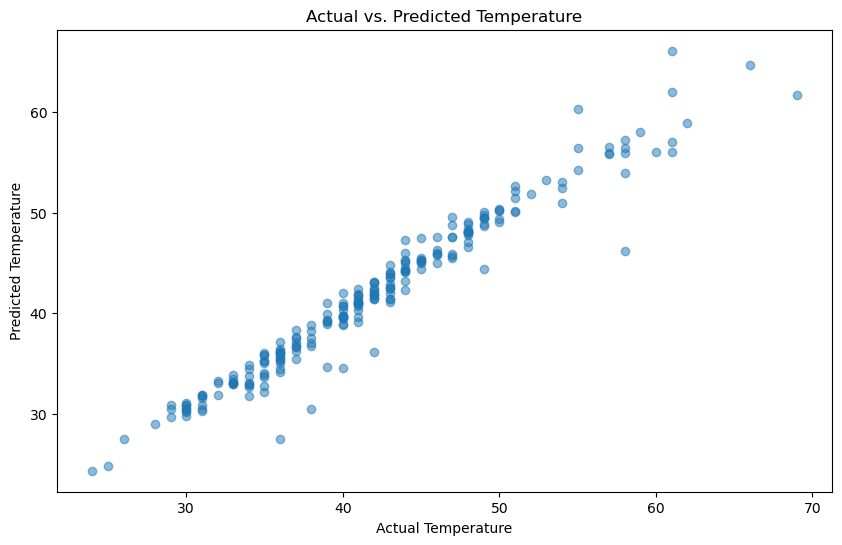

In [22]:
'''
model focusing on temperature

'''


import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Assuming city_dfs['nyc'] contains your dataset
df = city_dfs['nyc'].copy()
df['datetime'] = pd.to_datetime(df['datetime'])

# Feature engineering: extracting datetime components
df['hour'] = df['datetime'].dt.hour
df['day'] = df['datetime'].dt.day
df['month'] = df['datetime'].dt.month
# Add more feature engineering here if needed

# Define features (X) and target variables (Y)
X = df.drop(['datetime', 'temp', 'dew_point', 'humidity', 'wind_speed'], axis=1)
Y = df['temp']  # Only temperature as target variable for now, you can add others if needed

# Split the dataset into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Initialize and train the model
model = RandomForestRegressor(random_state=42)
model.fit(X_train, Y_train)

# Make predictions on the testing set
Y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(Y_test, Y_pred)
print("Model Test:")
print(f"Mean Squared Error: {mse}")

# Plot actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.scatter(Y_test, Y_pred, alpha=0.5)
plt.xlabel('Actual Temperature')
plt.ylabel('Predicted Temperature')
plt.title('Actual vs. Predicted Temperature')
plt.show()


In [26]:
from datetime import datetime

current_datetime = datetime.now()

# Extract features from current datetime
hour = current_datetime.hour
day = current_datetime.day
month = current_datetime.month

# Create a DataFrame with current datetime features
data = {'hour': [hour], 'day': [day], 'month': [month]}
current_data = pd.DataFrame(data)

# Make prediction
temperature_prediction = model.predict(current_data)

print("Predicted temperature for current datetime:", temperature_prediction[0])


# VERY WRONG 

Predicted temperature for current datetime: 68.83


Model Evaluation:
Mean Squared Error: 0.49218405172413776


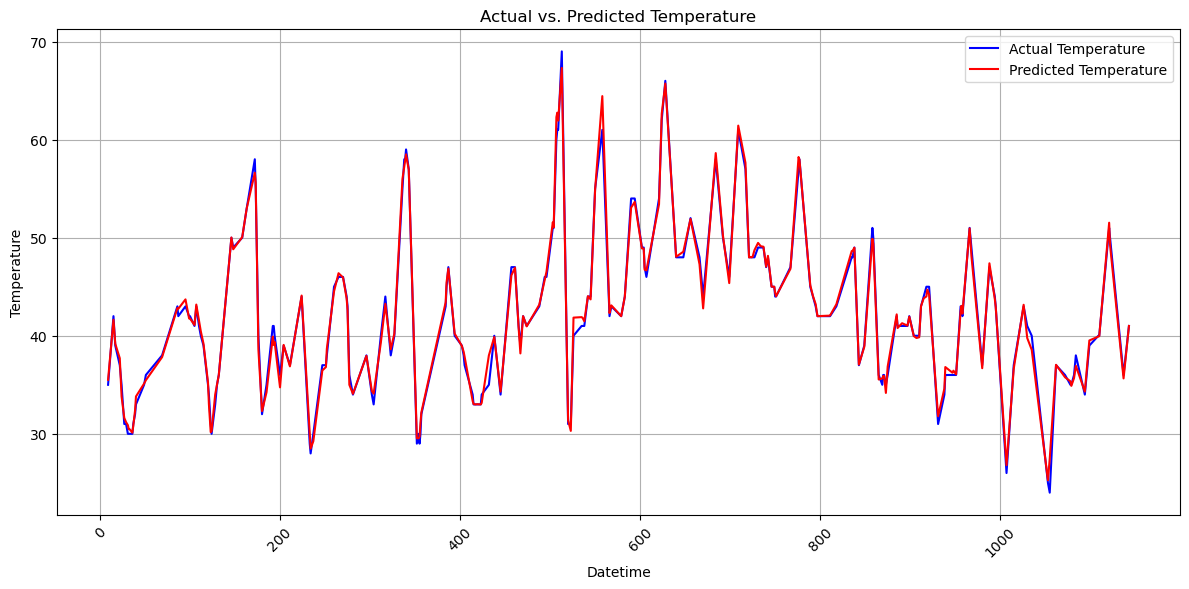

In [30]:
'''

model 2 trying to take into account what has happened before

this model is much better, but we want the input to just be X and Y


'''

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Assuming city_dfs['nyc'] contains your dataset

# Load the dataset
df = city_dfs['nyc'].copy()
df['datetime'] = pd.to_datetime(df['datetime'])

# Feature engineering: extract datetime components
df['hour'] = df['datetime'].dt.hour
df['day'] = df['datetime'].dt.day
df['month'] = df['datetime'].dt.month

# Define features (X) and target variable (Y)
X = df[['dew_point', 'humidity', 'wind_speed', 'hour', 'day', 'month']]
Y = df['temp']

# Split the dataset into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Initialize and train the model
model = RandomForestRegressor(random_state=42)
model.fit(X_train, Y_train)

# Make predictions on the testing set
Y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(Y_test, Y_pred)
print("Model Evaluation:")
print(f"Mean Squared Error: {mse}")

# Sort the test data by datetime for plotting
sorted_indices = Y_test.index.argsort()
Y_test_sorted = Y_test.iloc[sorted_indices]
Y_pred_sorted = Y_pred[sorted_indices]

# Plot actual vs. predicted temperature for each datetime
plt.figure(figsize=(12, 6))
plt.plot(Y_test_sorted.index, Y_test_sorted.values, label='Actual Temperature', color='blue')
plt.plot(Y_test_sorted.index, Y_pred_sorted, label='Predicted Temperature', color='red')
plt.title('Actual vs. Predicted Temperature')
plt.xlabel('Datetime')
plt.ylabel('Temperature')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()


In [49]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Assuming city_dfs['nyc'] contains your dataset

# Load the dataset
df = city_dfs['nyc'].copy()
df['datetime'] = pd.to_datetime(df['datetime'])

# Feature engineering: extract datetime components
df['hour'] = df['datetime'].dt.hour
df['day'] = df['datetime'].dt.day
df['month'] = df['datetime'].dt.month

# Shift the variables to get the t+1 values
df['temp+1'] = df['temp'].shift(-1)
df['dew_point+1'] = df['dew_point'].shift(-1)
df['humidity+1'] = df['humidity'].shift(-1)
df['wind_speed+1'] = df['wind_speed'].shift(-1)

# Drop the last row since it will contain NaN values due to shifting
df = df.dropna()

# Define features (X) and target variables (Y)
X = df[['temp', 'hour', 'day', 'month', 'dew_point', 'humidity', 'wind_speed']]
Y = df[['temp+1', 'dew_point+1', 'humidity+1', 'wind_speed+1']]

# Split the dataset into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Initialize and train the model
model = RandomForestRegressor(random_state=42)
model.fit(X_train, Y_train)

# Make predictions on the testing set
Y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(Y_test, Y_pred)
print("Model Evaluation:")
print(f"Mean Squared Error: {mse}")






Model Evaluation:
Mean Squared Error: 14.125746648917032


Model Evaluation:
Mean Squared Error: 13.751474424988023


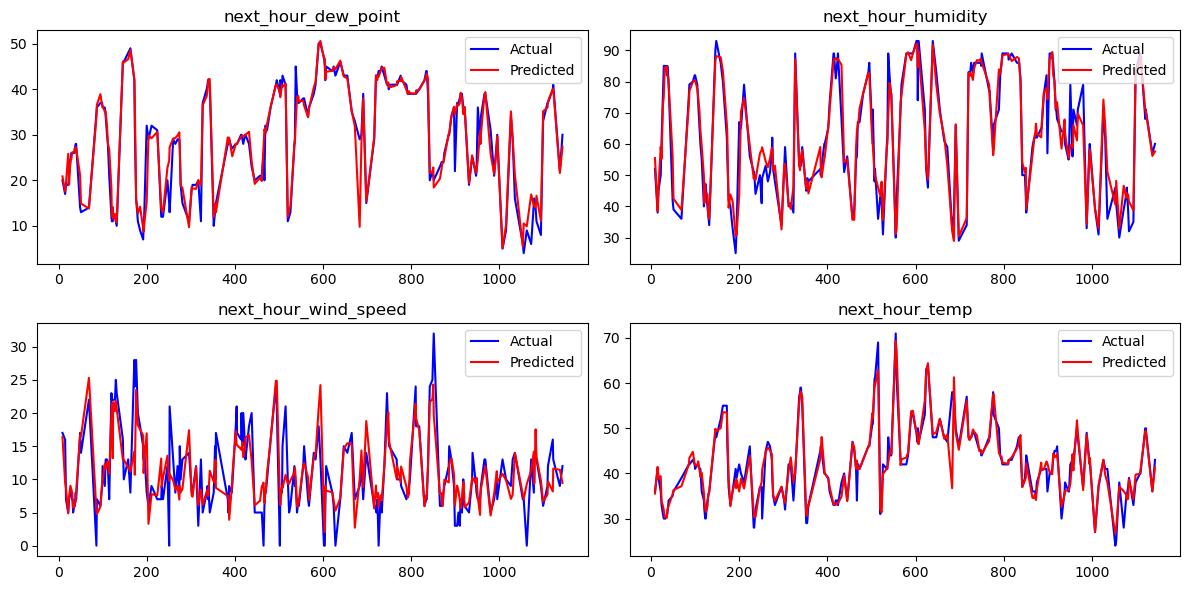

In [57]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Assuming city_dfs['nyc'] contains your dataset

# Load the dataset
df = city_dfs['nyc'].copy()
df['datetime'] = pd.to_datetime(df['datetime'])

# Feature engineering: extract datetime components
df['hour'] = df['datetime'].dt.hour
df['day'] = df['datetime'].dt.day
df['month'] = df['datetime'].dt.month

# Shift the features and target variable to get the next hour's data
df[['next_hour_dew_point', 'next_hour_humidity', 'next_hour_wind_speed', 'next_hour_temp']] = df[['dew_point', 'humidity', 'wind_speed', 'temp']].shift(-1)

# Drop rows where next_hour_temp is NaN (last hour)
df.dropna(subset=['next_hour_dew_point', 'next_hour_humidity', 'next_hour_wind_speed', 'next_hour_temp'], inplace=True)

# Define features (X) and target variables (Y)
X = df[['dew_point', 'humidity', 'wind_speed', 'hour', 'day', 'month']]
Y = df[['next_hour_dew_point', 'next_hour_humidity', 'next_hour_wind_speed', 'next_hour_temp']]

# Split the dataset into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Initialize and train the model
model = RandomForestRegressor(random_state=42)
model.fit(X_train, Y_train)

# Make predictions on the testing set
Y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(Y_test, Y_pred)
print("Model Evaluation:")
print(f"Mean Squared Error: {mse}")

# Sort the test data by datetime for plotting
sorted_indices = Y_test.index.argsort()
Y_test_sorted = Y_test.iloc[sorted_indices]
Y_pred_sorted = Y_pred[sorted_indices]

# Plot actual vs. predicted for each feature
plt.figure(figsize=(12, 6))
for i in range(Y_test_sorted.shape[1]):
    plt.subplot(2, 2, i + 1)
    plt.plot(Y_test_sorted.index, Y_test_sorted.iloc[:, i], label='Actual', color='blue')
    plt.plot(Y_test_sorted.index, Y_pred_sorted[:, i], label='Predicted', color='red')
    plt.title(Y.columns[i])
    plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd

def forecast_future_data(model, last_data_instance, forecast_hours):
    # Create a copy of the last data instance
    forecast_data = last_data_instance.copy()
    
    # Convert datetime to pandas datetime object
    forecast_data['datetime'] = pd.to_datetime(forecast_data['datetime'])
    
    # Initialize a list to store forecasted data
    forecasted_data = []
    
    # Iterate over the forecast hours
    for _ in range(forecast_hours):
        # Extract features from the last instance
        last_datetime = forecast_data['datetime'].iloc[-1]
        hour = last_datetime.hour
        day = last_datetime.day
        month = last_datetime.month
        
        # Predict the next hour's features
        features = [[forecast_data['dew_point'].iloc[-1], 
                     forecast_data['humidity'].iloc[-1], 
                     forecast_data['wind_speed'].iloc[-1], 
                     hour, day, month]]
        predicted_features = model.predict(features)
        
        # Append the predicted features to the last instance
        next_hour_instance = forecast_data.iloc[-1].copy()
        next_hour_instance['datetime'] += pd.Timedelta(hours=1)
        next_hour_instance['dew_point'] = predicted_features[0][0]
        next_hour_instance['humidity'] = predicted_features[0][1]
        next_hour_instance['wind_speed'] = predicted_features[0][2]
        next_hour_instance['temp'] = predicted_features[0][3]
        
        # Append the next hour's instance to the forecasted data list
        forecasted_data.append(next_hour_instance)
        
        # Append the predicted features to the last instance for the next iteration
        forecast_data = forecast_data.append(next_hour_instance, ignore_index=True)
    
    # Concatenate forecasted data instances into a DataFrame
    forecasted_df = pd.concat(forecasted_data, axis=1).transpose()
    
    return forecasted_df


# Assuming model is your trained model and last_instance is the last instance of data for 'nyc'
forecast_hours = 240  # Number of hours to forecast
# Assuming city_dfs['nyc'] contains your dataset
last_instance = city_dfs['nyc'].iloc[-1:]  # Use iloc[-1:] to get the last row as a DataFrame
forecasted_data = forecast_future_data(model, last_instance, forecast_hours)




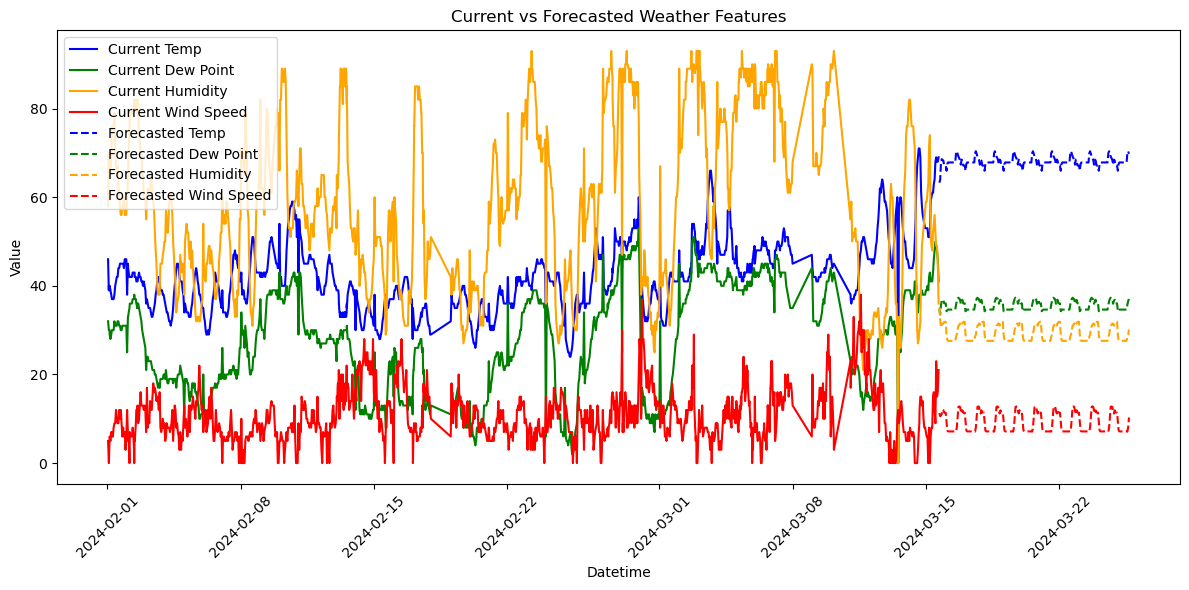

In [67]:
import matplotlib.pyplot as plt

# Plot current data
plt.figure(figsize=(12, 6))

# Plot temp
plt.plot(city_dfs['nyc']['datetime'], city_dfs['nyc']['temp'], label='Current Temp', color='blue')

# Plot dew_point
plt.plot(city_dfs['nyc']['datetime'], city_dfs['nyc']['dew_point'], label='Current Dew Point', color='green')

# Plot humidity
plt.plot(city_dfs['nyc']['datetime'], city_dfs['nyc']['humidity'], label='Current Humidity', color='orange')

# Plot wind_speed
plt.plot(city_dfs['nyc']['datetime'], city_dfs['nyc']['wind_speed'], label='Current Wind Speed', color='red')

# Plot forecasted data
# Plot temp
plt.plot(forecasted_data['datetime'], forecasted_data['temp'], label='Forecasted Temp', linestyle='--', color='blue')

# Plot dew_point
plt.plot(forecasted_data['datetime'], forecasted_data['dew_point'], label='Forecasted Dew Point', linestyle='--', color='green')

# Plot humidity
plt.plot(forecasted_data['datetime'], forecasted_data['humidity'], label='Forecasted Humidity', linestyle='--', color='orange')

# Plot wind_speed
plt.plot(forecasted_data['datetime'], forecasted_data['wind_speed'], label='Forecasted Wind Speed', linestyle='--', color='red')

# Add labels and legend
plt.xlabel('Datetime')
plt.ylabel('Value')
plt.title('Current vs Forecasted Weather Features')
plt.legend()

# Show plot
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Model Evaluation:
Mean Squared Error: 14.616532913023102


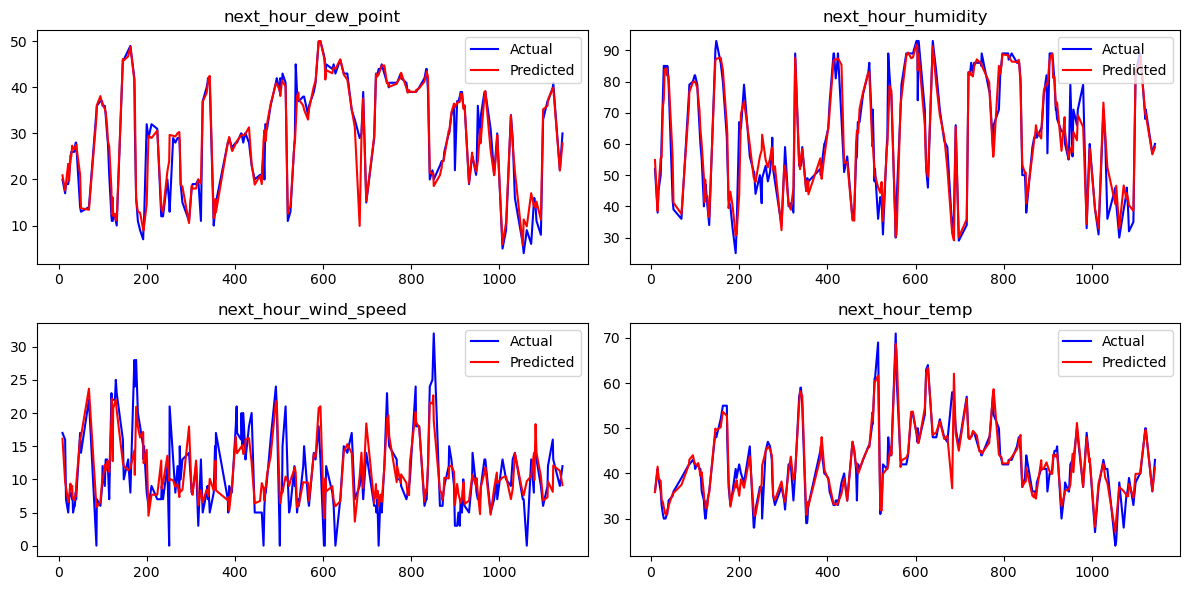

In [68]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Assuming city_dfs['nyc'] contains your dataset

# Load the dataset
df = city_dfs['nyc'].copy()
df['datetime'] = pd.to_datetime(df['datetime'])

# Feature engineering: extract datetime components
df['hour'] = df['datetime'].dt.hour
df['day'] = df['datetime'].dt.day
df['month'] = df['datetime'].dt.month

# Shift the features and target variable to get the next hour's data
df[['next_hour_dew_point', 'next_hour_humidity', 'next_hour_wind_speed', 'next_hour_temp']] = df[['dew_point', 'humidity', 'wind_speed', 'temp']].shift(-1)

# Drop rows where next_hour_temp is NaN (last hour)
df.dropna(subset=['next_hour_dew_point', 'next_hour_humidity', 'next_hour_wind_speed', 'next_hour_temp'], inplace=True)

# Define features (X) and target variables (Y)
X = df[['dew_point', 'humidity', 'wind_speed', 'hour', 'day', 'month']]
Y = df[['next_hour_dew_point', 'next_hour_humidity', 'next_hour_wind_speed', 'next_hour_temp']]

# Split the dataset into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Construct a pipeline with StandardScaler and RandomForestRegressor
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', RandomForestRegressor(random_state=42))
])

# Define hyperparameters grid for RandomForestRegressor
param_grid = {
    'regressor__n_estimators': [100, 200, 300],
    'regressor__max_depth': [None, 10, 20],
    'regressor__min_samples_split': [2, 5, 10],
    'regressor__min_samples_leaf': [1, 2, 4]
}

# Perform GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, Y_train)

# Get the best model from GridSearchCV
best_model = grid_search.best_estimator_

# Make predictions on the testing set
Y_pred = best_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(Y_test, Y_pred)
print("Model Evaluation:")
print(f"Mean Squared Error: {mse}")

# Sort the test data by datetime for plotting
sorted_indices = Y_test.index.argsort()
Y_test_sorted = Y_test.iloc[sorted_indices]
Y_pred_sorted = Y_pred[sorted_indices]

# Plot actual vs. predicted for each feature
plt.figure(figsize=(12, 6))
for i in range(Y_test_sorted.shape[1]):
    plt.subplot(2, 2, i + 1)
    plt.plot(Y_test_sorted.index, Y_test_sorted.iloc[:, i], label='Actual', color='blue')
    plt.plot(Y_test_sorted.index, Y_pred_sorted[:, i], label='Predicted', color='red')
    plt.title(Y.columns[i])
    plt.legend()
plt.tight_layout()
plt.show()


In [72]:
import pandas as pd

def forecast_future_data(model, last_data_instance, forecast_hours):
    # Create a copy of the last data instance
    forecast_data = last_data_instance.copy()
    
    # Convert datetime to pandas datetime object
    forecast_data['datetime'] = pd.to_datetime(forecast_data['datetime'])
    
    # Initialize a list to store forecasted data
    forecasted_data = []
    
    # Iterate over the forecast hours
    for _ in range(forecast_hours):
        # Extract features from the last instance
        last_datetime = forecast_data['datetime'].iloc[-1]
        hour = last_datetime.hour
        day = last_datetime.day
        month = last_datetime.month
        
        # Predict the next hour's features
        features = [[forecast_data['dew_point'].iloc[-1], 
                     forecast_data['humidity'].iloc[-1], 
                     forecast_data['wind_speed'].iloc[-1], 
                     hour, day, month]]
        predicted_features = model.predict(features)
        
        # Append the predicted features to the last instance
        next_hour_instance = forecast_data.iloc[-1].copy()
        next_hour_instance['datetime'] += pd.Timedelta(hours=1)
        next_hour_instance['dew_point'] = predicted_features[0][0]
        next_hour_instance['humidity'] = predicted_features[0][1]
        next_hour_instance['wind_speed'] = predicted_features[0][2]
        next_hour_instance['temp'] = predicted_features[0][3]
        
        # Append the next hour's instance to the forecasted data list
        forecasted_data.append(next_hour_instance)
        
        # Append the predicted features to the last instance for the next iteration
        forecast_data = forecast_data.append(next_hour_instance, ignore_index=True)
    
    # Concatenate forecasted data instances into a DataFrame
    forecasted_df = pd.concat(forecasted_data, axis=1).transpose()
    
    return forecasted_df


# Assuming model is your trained model and last_instance is the last instance of data for 'nyc'
forecast_hours = 240  # Number of hours to forecast
# Assuming city_dfs['nyc'] contains your dataset
last_instance = city_dfs['nyc'].iloc[-1:]  # Use iloc[-1:] to get the last row as a DataFrame
forecasted_data = forecast_future_data(best_model, last_instance, forecast_hours)




/Users/samdvorin/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


ValueError: X has 3 features, but StandardScaler is expecting 6 features as input.